# What does face recognition do?

Face detection is a pre-operation for various subsequent processes, and the most common follow-up process is face recognition. Face recognition is a biometric recognition technology based on human facial feature information for identification. A series of related techniques for capturing an image or video stream containing a face with a camera or a camera, and automatically detecting and tracking the face in the image, and then performing face recognition on the detected face, usually called portrait recognition, face recognition .

In the FaceAPI class, the function of the following interface is face recognition:
- extractFeature(img,rect) : Face feature extraction function, input face area, return Feature, represent the feature describing the current face

Its input is the face frame detected, and the output is a one-dimensional floating point array generated by the complex operation of the face frame and the image data therein. This array is called the feature of the face, and the variable name is Feature.

Next, we first try to extract features from the faces in a picture.

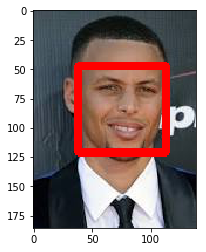

Feature(-0.15,-0.01,0.05,-0.07,-0.13,-0.08,0.01,-0.13,0.20,-0.09,0.28,0.03,-0.20,-0.10,0.01,0.07,-0.13,-0.16,-0.02,-0.06,0.05,-0.08,-0.06,0.07,-0.13,-0.24,-0.13,-0.14,0.08,-0.13,0.02,-0.01,-0.22,-0.09,-0.01,0.08,0.03,-0.05,0.13,-0.07,-0.12,-0.04,0.02,0.17,0.13,0.03,0.05,-0.04,0.04,-0.23,0.03,0.12,0.12,0.04,0.05,-0.20,0.02,0.08,-0.18,0.15,0.08,-0.06,-0.08,0.02,0.22,0.08,-0.13,-0.12,0.18,-0.14,-0.03,0.10,-0.12,-0.19,-0.18,0.05,0.45,0.12,-0.21,0.02,-0.20,0.01,0.02,-0.05,0.03,-0.05,-0.18,0.07,0.19,-0.00,0.06,0.20,-0.01,0.01,-0.02,0.10,-0.05,0.02,-0.02,-0.01,0.10,-0.06,0.01,0.07,-0.16,0.12,0.01,-0.00,-0.04,0.00,-0.09,0.00,0.15,-0.29,0.29,0.19,-0.02,0.12,-0.02,0.04,0.02,-0.12,-0.12,-0.10,-0.08,-0.08,0.03,0.03)


In [1]:
from API.FaceAPI_dlib import *
faceAPI = FaceAPI()

img = cv2.imread('data/Curry.png')
rects = faceAPI.detect(img)
showWithRects(img,rects)
feature = faceAPI.extractFeature(img,rects[0])
print(feature)

It can be seen that the extracted feature is a series of floating point numbers, which form a high dimensional array, which represents the characteristics of a face.

## Face Comparison

Face features may not be as intuitive as face frames, how does it relate to the application? Face recognition, as the name suggests, needs to identify who the current face is, then how to determine that the current face image and another face image belong to the same person? At this point, the face is used in comparison. By comparing the characteristics of two different images, we can get the similarity of the two faces. The higher the similarity, the more likely the same person is. The lower the similarity, the less likely the same person is. .

In the FaceAPI class, the function of the following interface is face recognition:
- compare(feature_1, feature_2, threshold=0.5): Face matching function, input two face features, determine whether it is the same person through the threshold

Its input is two characteristics, and a face similarity score is calculated internally. The range of the score is (-1, 1). It is returned whether the two features belong to one person by judging whether the score is greater than the threshold threshold.

Next we provide three pictures, please try to judge which of the three figures is the same person.

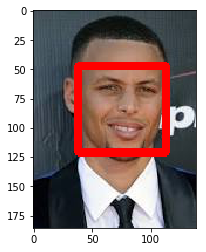

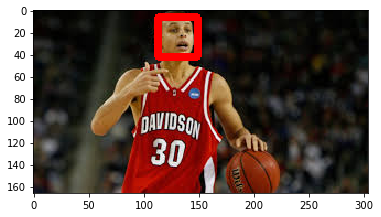

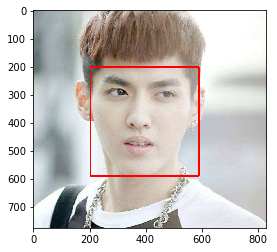

face 0 and 1 : True
face 0 and 2 : False
face 1 and 2: False


In [6]:
img_0 = cv2.imread('data/compare_0.png')
img_1 = cv2.imread('data/compare_1.png')
img_2 = cv2.imread('data/compare_2.png')

rects_0 = faceAPI.detect(img_0)
showWithRects(img_0,rects_0)
feature_0 = faceAPI.extractFeature(img_0,rects_0[0])

rects_1 = faceAPI.detect(img_1)
showWithRects(img_1,rects_1)
feature_1 = faceAPI.extractFeature(img_1,rects_1[0])

rects_2 = faceAPI.detect(img_2)
showWithRects(img_2,rects_2)
feature_2 = faceAPI.extractFeature(img_2,rects_2[0])

print("face 0 and 1 :",faceAPI.compare(feature_0,feature_1))
print("face 0 and 2 :",faceAPI.compare(feature_0,feature_2))
print("face 1 and 2:",faceAPI.compare(feature_1,feature_2))

通过两两判断，我们明显可以看到face0和face1是属于同一个人，face2是另外一个人的脸。